In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [4]:
sidewalks = gpd.read_file('./accessmap/projects/crossify/test/input/udistrict_sidewalks.geojson')

OSError: no such file or directory: './accessmap/projects/crossify/test/input/udistrict_sidewalks.geojson'

In [8]:
foot = sidewalks[sidewalks['foot'] == 'yes']
foot

,timestamp,version,changeset,user,uid,foot,footway,highway,id,lit,...,gtfs:stop_id,operator,public_transport,ref,shelter,source,kerb,tactile_paving,entrance,geometry
0,2017-02-26T23:24:35Z,8,46428403,NickBolten,2773196,yes,sidewalk,footway,way/272711571,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-122.3119423 47.6569598, -122.3119..."
22,2017-02-20T06:11:41Z,4,46233958,nbolten_import,5348229,yes,sidewalk,footway,way/436161748,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (-122.3134001 47.6554413, -122.3133..."
582,2017-08-22T06:14:20Z,5,51325872,sctrojan79,2601744,yes,None,None,node/4694732478,None,...,None,None,None,None,None,None,lowered,yes,None,POINT (-122.3142924 47.6553254)


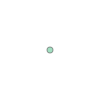

In [25]:
point = foot.loc[582].geometry
point

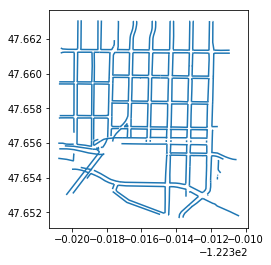

In [22]:
lines = sidewalks[sidewalks.geometry.type == 'LineString']
lines.plot()

In [38]:
distances = lines.distance(point)
sidewalk = sidewalks.loc[distances[distances == distances.min()].index[0]]
sidewalk

timestamp                                        2017-02-27T00:39:01Z
version                                                             1
changeset                                                    46429365
user                                                       NickBolten
uid                                                           2773196
foot                                                             None
footway                                                      sidewalk
highway                                                       footway
id                                                      way/477384076
lit                                                              None
surface                                                          None
name                                                             None
wheelchair                                                       None
horse                                                            None
bicycle             

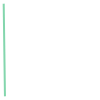

In [39]:
sidewalk_geom = sidewalk.geometry
sidewalk_geom

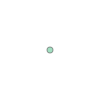

In [45]:
# Check shapely manual
distance_along = sidewalk_geom.project(point)
sidewalk_point = sidewalk_geom.interpolate(distance_along)
sidewalk_point

In [2]:
gpd.GeoDataFrame(pd.concat([lines, 
                            gpd.GeoDataFrame({'geometry': [sidewalk_point]})
                            
                            
                            ))])

SyntaxError: invalid syntax (<ipython-input-2-32e32ee2c5a8>, line 5)

In [61]:
mylist = [x.object for x in lines.sindex.nearest(point.bounds, 10, objects=True)]
mylist

[304, 96, 300, 94, 303, 328, 327, 302, 24, 299]

In [63]:
lines.loc[mylist].distance(point)

304    0.000000
96     0.000022
300    0.000053
94     0.000053
303    0.000057
328    0.000109
327    0.000109
302    0.000125
24     0.000128
299    0.000201
dtype: float64

In [ ]:
max_dist = 10
record = []

n = 1
while True:
    matches = [x.object for x in gdf.sindex.nearest(coords, n, True)]
    distance = gdf.loc[matches[-1]].distance(point)
    if distance < max_dist:
        record.append(gdf.loc[matches[-1]])
        n += 1
    else:
        break